In [1]:
import urllib
from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

print ("Packages loaded")

Packages loaded


# Get it!

In [2]:
dates = []
date_strs = []
last_trade_prices = []
for nrpage in range(200):
    rawurl = "http://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page="
    url = rawurl + str(nrpage+1)
    # Get data (parse)
    soup = BeautifulSoup(urllib.urlopen(url).read())
    dateinfo  = soup.find_all('td', {'class': 'date'})
    valueinfo = soup.find_all('td', {'class': 'number_1'})
    nrdata    = len(valueinfo)
    for i in range(nrdata):
        # Date
        currdate = str(dateinfo[int(i/4)])
        currdate = currdate.replace('<td class="date">', '')
        currdate = currdate.replace('</td>', '')
        currdate = currdate.replace('.', "")

        # Values
        currdata = str(valueinfo[i])
        currdata = currdata.replace('<td class="number_1">', "")
        currdata = currdata.replace('</td>', "")
        currdata = currdata.replace('<span class="tah p11 red01">', '')
        currdata = currdata.replace('</span>', "")
        currdata = currdata.replace('<td class="number_1" style="padding-right:40px;">', "")
        currdata = currdata.replace('<td class="number_1" style="padding-right:30px;">', "")
        currdata = currdata.replace('<span class="tah p11 nv01">', "")
        currdata = currdata.replace(' ', "")
        currdata = currdata.replace('\n', "")
        currdata = currdata.replace('\t', "")
        currdata = currdata.replace(',', "")

        if i % 4 == 0:
            print ("\nCurr date is %s" % (currdate))
            date_strs.append(currdate)
            dates.append(float(currdate))
            print ("Last traded price: %s" % (currdata))
            last_trade_prices.append(float(currdata))
        elif i % 4 == 1:
            print ("Fluctuation ratio: %s" % (currdata))
        elif i % 4 == 2:
            print ("Traded volume:     %s" % (currdata))
        elif i % 4 == 3:
            print ("Traded price:      %s" % (currdata))
# 
dates.reverse()
date_strs.reverse()
last_trade_prices.reverse()


Curr date is 20160711
Last traded price: 1988.54
Fluctuation ratio: +1.30%
Traded volume:     332552
Traded price:      4239228

Curr date is 20160708
Last traded price: 1963.10
Fluctuation ratio: -0.56%
Traded volume:     345926
Traded price:      4066529

Curr date is 20160707
Last traded price: 1974.08
Fluctuation ratio: +1.07%
Traded volume:     374574
Traded price:      3866686

Curr date is 20160706
Last traded price: 1953.12
Fluctuation ratio: -1.85%
Traded volume:     451690
Traded price:      4683910

Curr date is 20160705
Last traded price: 1989.85
Fluctuation ratio: -0.27%
Traded volume:     398730
Traded price:      3872453

Curr date is 20160704
Last traded price: 1995.30
Fluctuation ratio: +0.40%
Traded volume:     462342
Traded price:      4047771

Curr date is 20160701
Last traded price: 1987.32
Fluctuation ratio: +0.86%
Traded volume:     442076
Traded price:      4280276

Curr date is 20160630
Last traded price: 1970.35
Fluctuation ratio: +0.72%
Traded volume:     34

# Plot

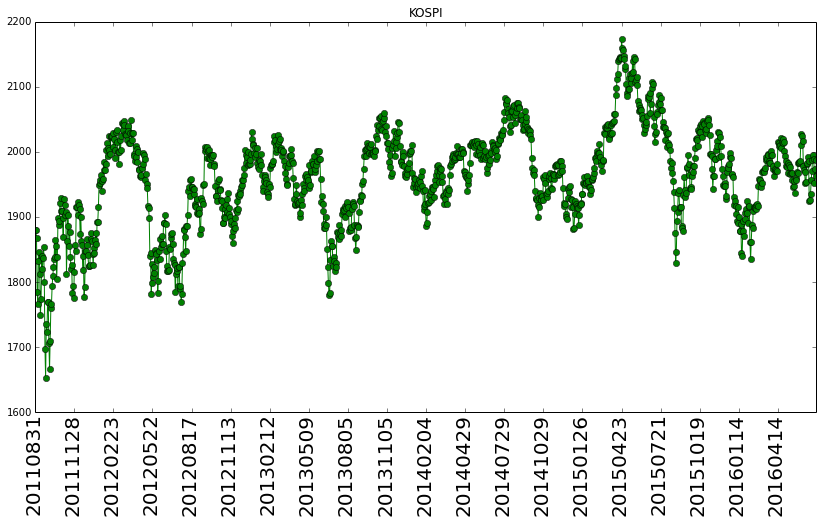

In [7]:
plt.figure(1, figsize=(14, 7))
n = len(last_trade_prices)
x = range(n)
step = int(n/20)
plt.xticks(x[0:n:step], date_strs[0:n:step], fontsize=20, rotation='vertical')
plt.plot(last_trade_prices, "go-")
plt.title("KOSPI")